<p style="text-align: center; font-size: 28px;"><b>Support Vector Machines</b></p>

summary

# Support Vector Machines (SVM)

A Support Vector Machine (SVM) is a supervised machine learning model mainly used for classification tasks. It works by creating a **decision boundary** that separates data points into categories. New, unseen points are classified depending on which side of the boundary they fall.

- **2 Features:** The decision boundary is a line.  
- **3 Features:** The decision boundary becomes a plane.  
- **More than 3 Features:** The boundary is called a **separating hyperplane**.  

**Example:**  
In a dataset of fictional Quidditch games, features like:  
- average goals scored  
- average time to catch the Golden Snitch  

can be used to predict if a team makes the playoffs.  

SVMs extend this principle to higher dimensions, where the separating structure is harder to visualize, but the logic remains the same.

Decision boundaries are easiest to wrap your head around when the data has two features. In this case, the decision boundary is a line. Take a look at the example below.

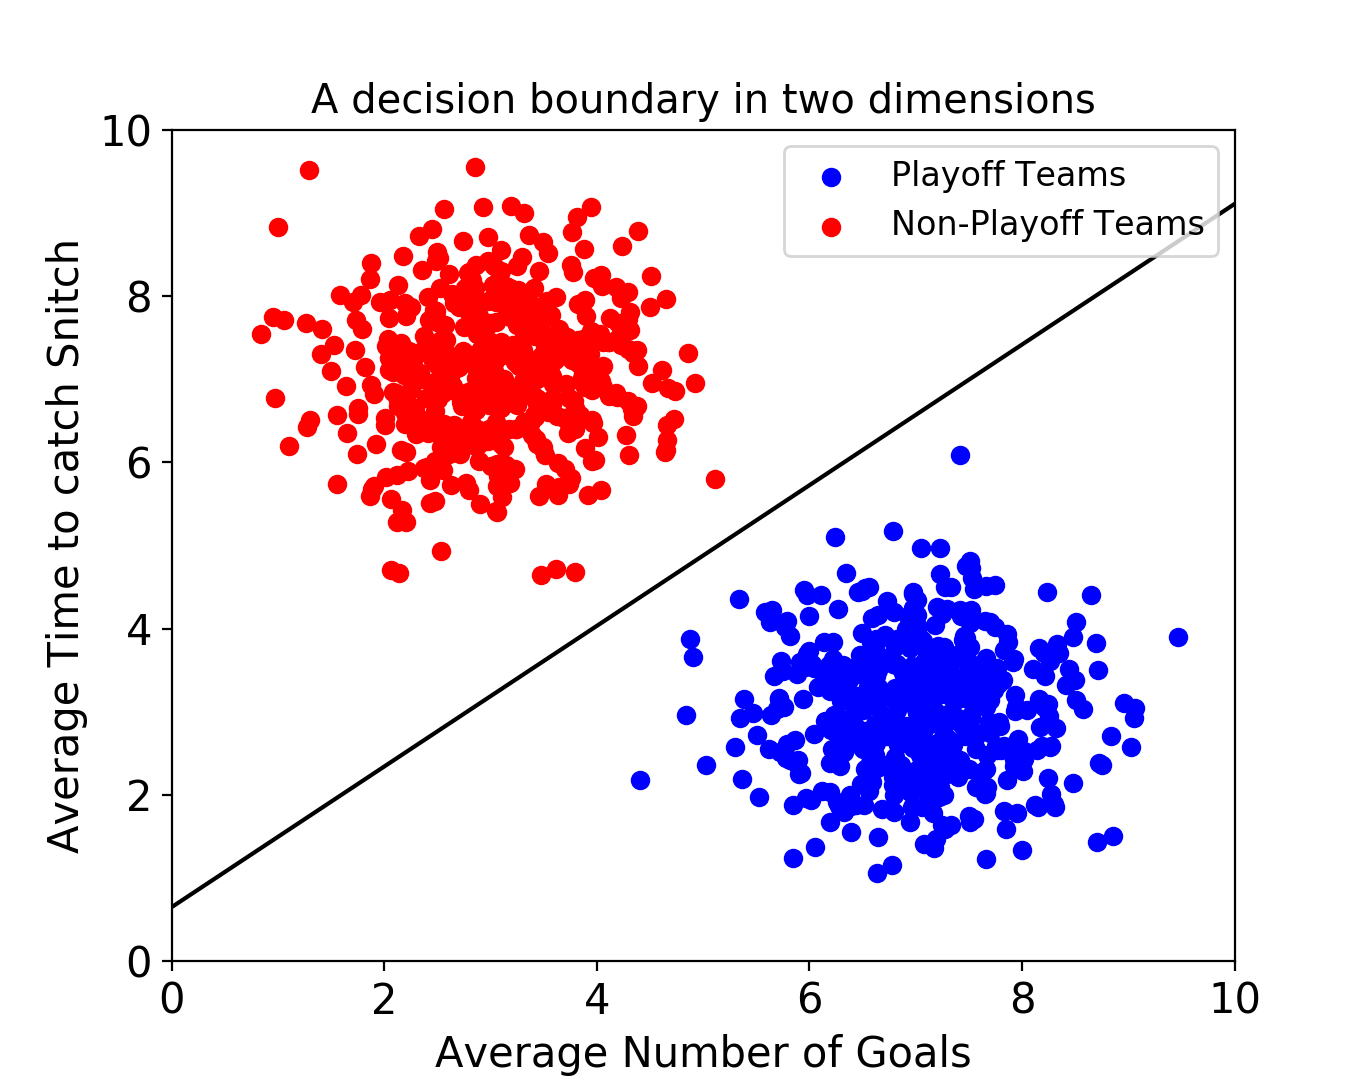

In this example, the SVM is trained on fictional Quidditch matches from the Harry Potter universe. The goal of the classifier is to predict whether a team qualifies for the playoffs. Each training point represents a past Quidditch team, described by two features:  
- the team’s average number of goals, and  
- the average time it takes to catch the Golden Snitch.  

Once the decision boundary is learned from this training data, the SVM can classify new, unseen teams by predicting on which side of the boundary they fall.

Decision boundaries are not limited to two features. With three features, the boundary becomes a plane instead of a line.

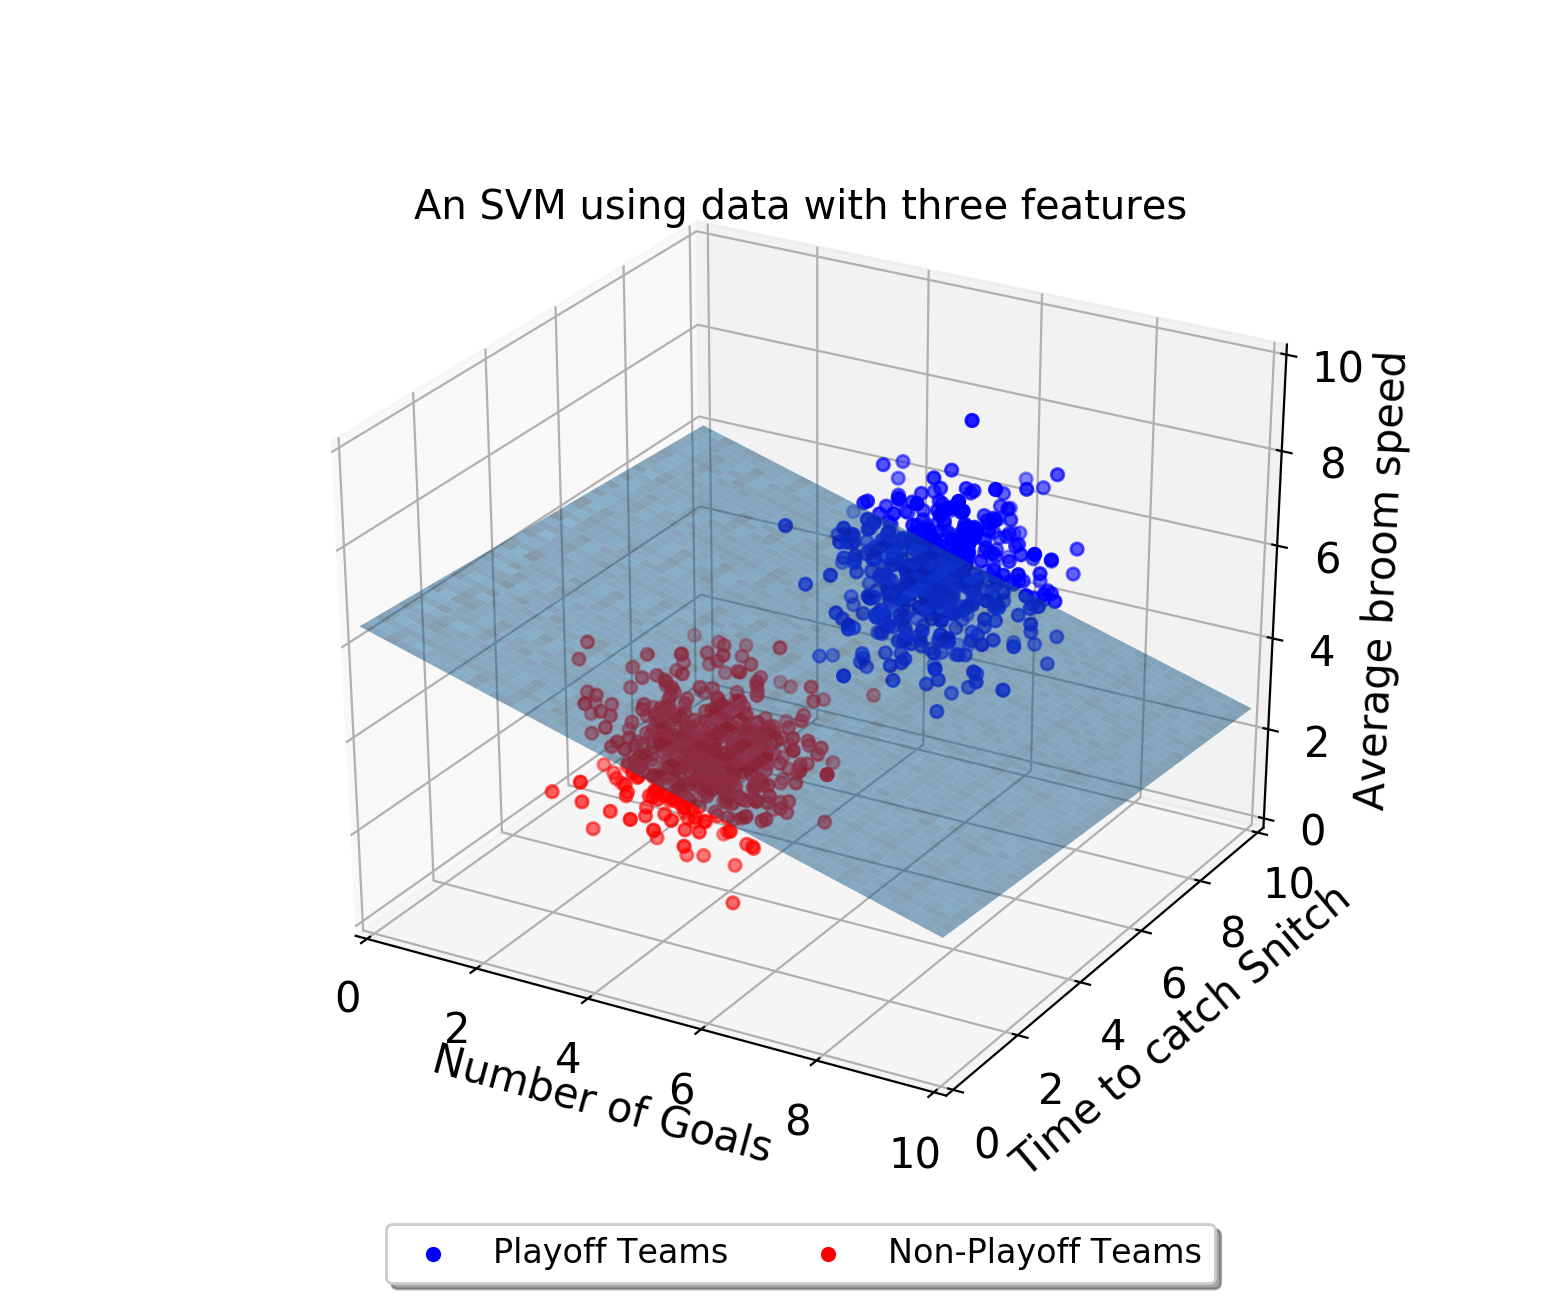

As the number of dimensions grows past 3, it becomes very difficult to visualize these points in space. Nonetheless, SVMs can still find a decision boundary. However, rather than being a separating line, or a separating plane, the decision boundary is called a separating **hyperplane**.

# Optimal Decision Boundaries

When multiple separating lines (or hyperplanes) are possible, an SVM chooses the one that stays **maximally far** from the nearest training points of **both** classes. This “maximum margin” boundary reduces the risk of misclassifying new points that lie near the edge.

- Many lines may separate the classes, but they are not equally good.
- A boundary **too close** to one class (like in example **C**) makes near-edge points more likely to be mislabeled.
- The **best** boundary (like in example **F**) maximizes the margin, improving robustness to small variations in data.

Take a look at the image below:

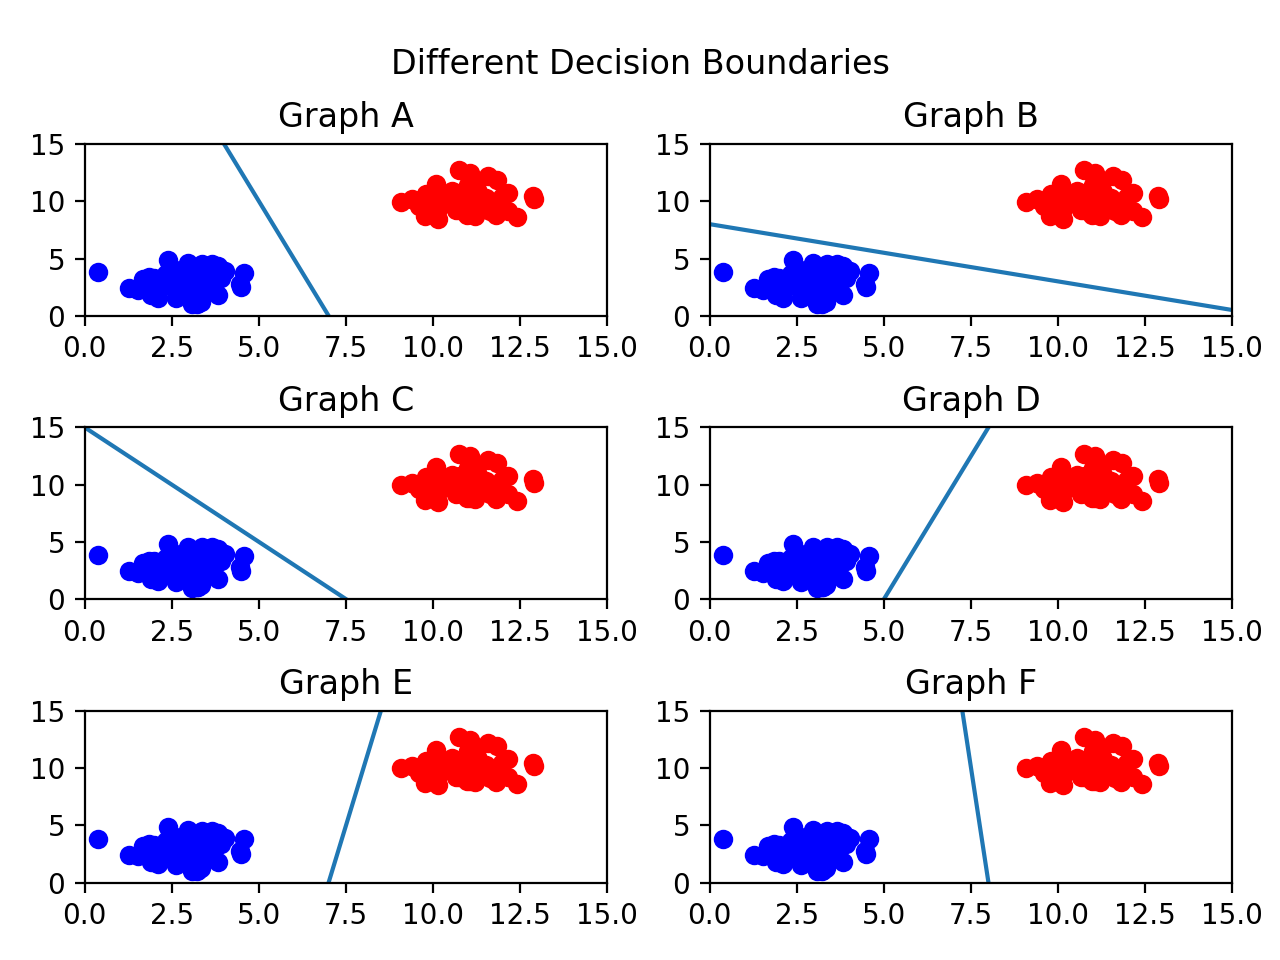

There are so many valid decision boundaries, but which one is best? In general, we want our decision boundary to be as far away from training points as possible.

Maximizing the distance between the decision boundary and points in each class will decrease the chance of false classification. Take graph C for example.

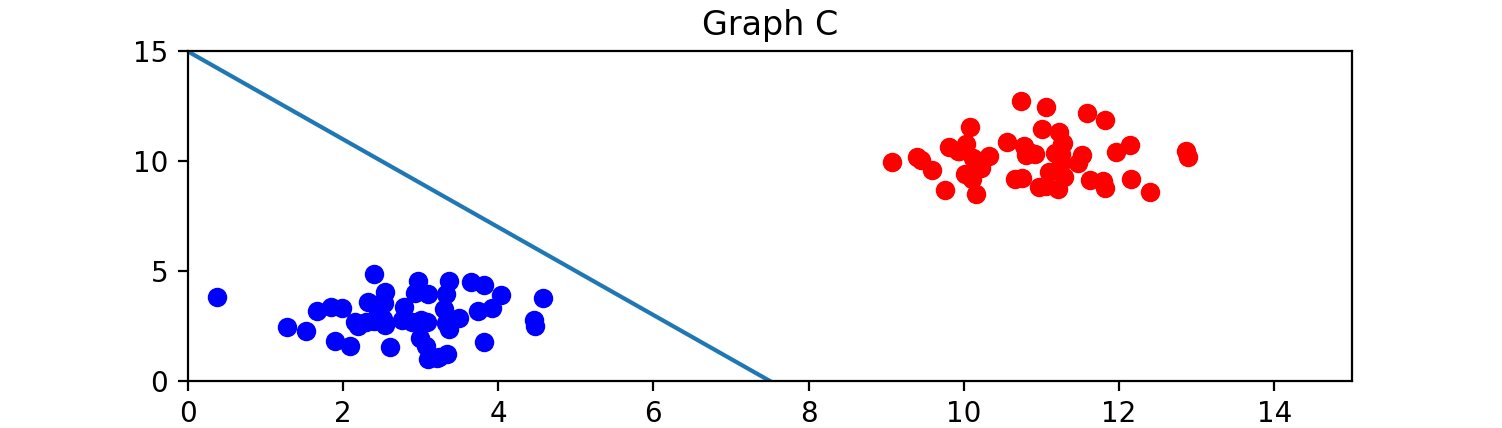

he decision boundary is close to the blue class, so it is possible that a new point close to the blue cluster would fall on the red side of the line.

Out of all the 
graphs
Preview: Docs Graphs are a way of modeling systems based on a node and edge structure for representing the relationships between items.
 shown here, graph F has the best decision boundary.

# Support Vectors and Margins

To create a strong decision boundary, SVMs rely on specific training points called **support vectors**. These are the points that lie closest to the decision boundary, and they are the ones that actually define it. Instead of viewing training data as points, we can think of them as **vectors from the origin** — hence the name “support vectors.”

- If there are **n features**, at least **n+1 support vectors** are required.  
- The **margin** is the distance between the support vectors and the decision boundary.  
- The goal of an SVM is to **maximize this margin**, making predictions more reliable.

Because only support vectors are needed to define the boundary, the rest of the training points can effectively be ignored. This makes SVMs efficient compared to many other supervised learning algorithms that rely on all data points for classification.
 
But why are they called vectors? Instead of thinking about the training data as points, we can think of them as vectors coming from the origin.

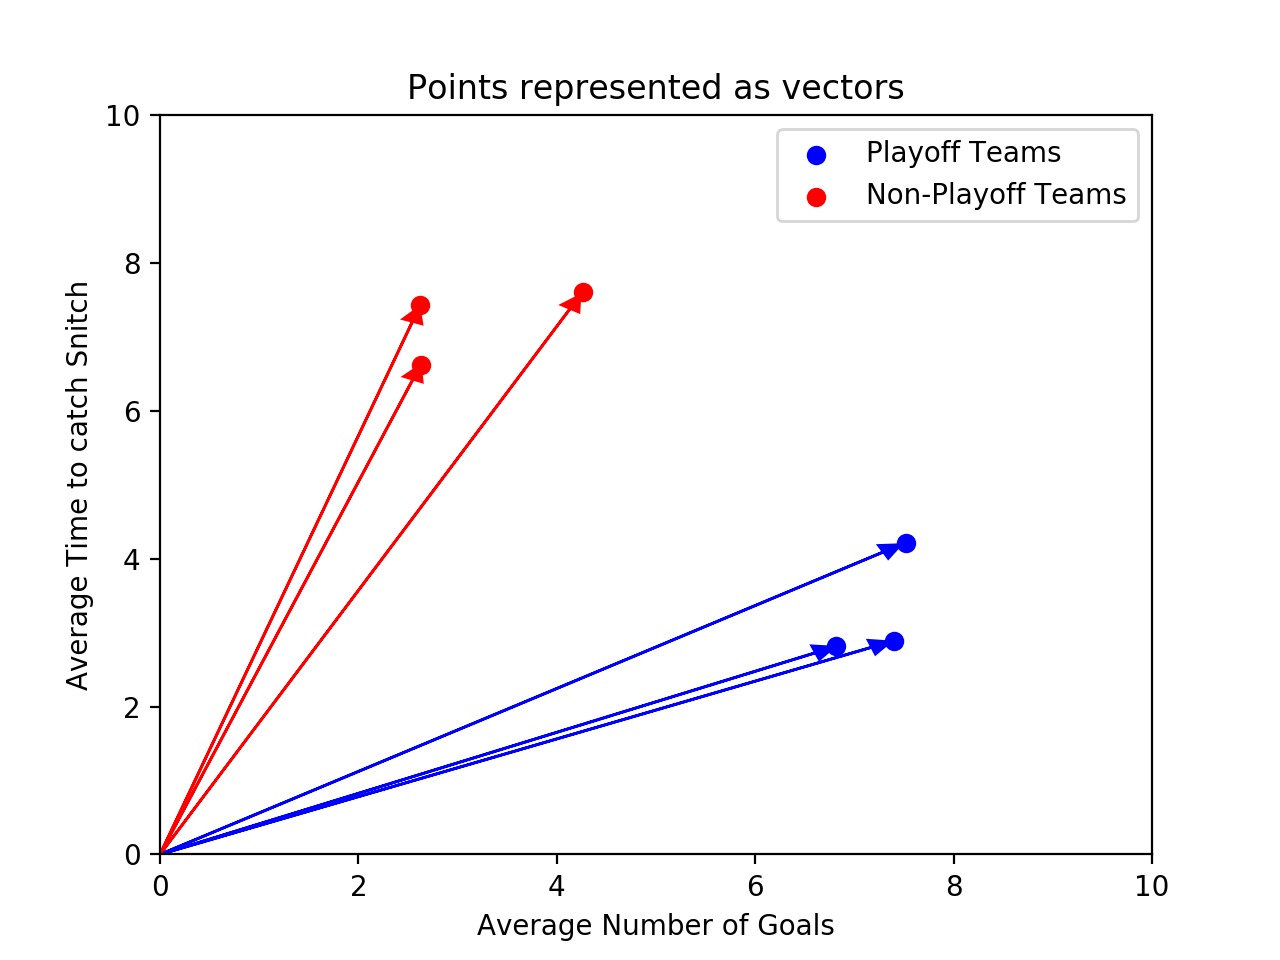

These vectors are crucial in defining the decision boundary — that’s where the “support” comes from. If you are using n features, there are at least n+1 support vectors.

The distance between a support vector and the decision boundary is called the margin. We want to make the margin as large as possible. The support vectors are highlighted in the image below:

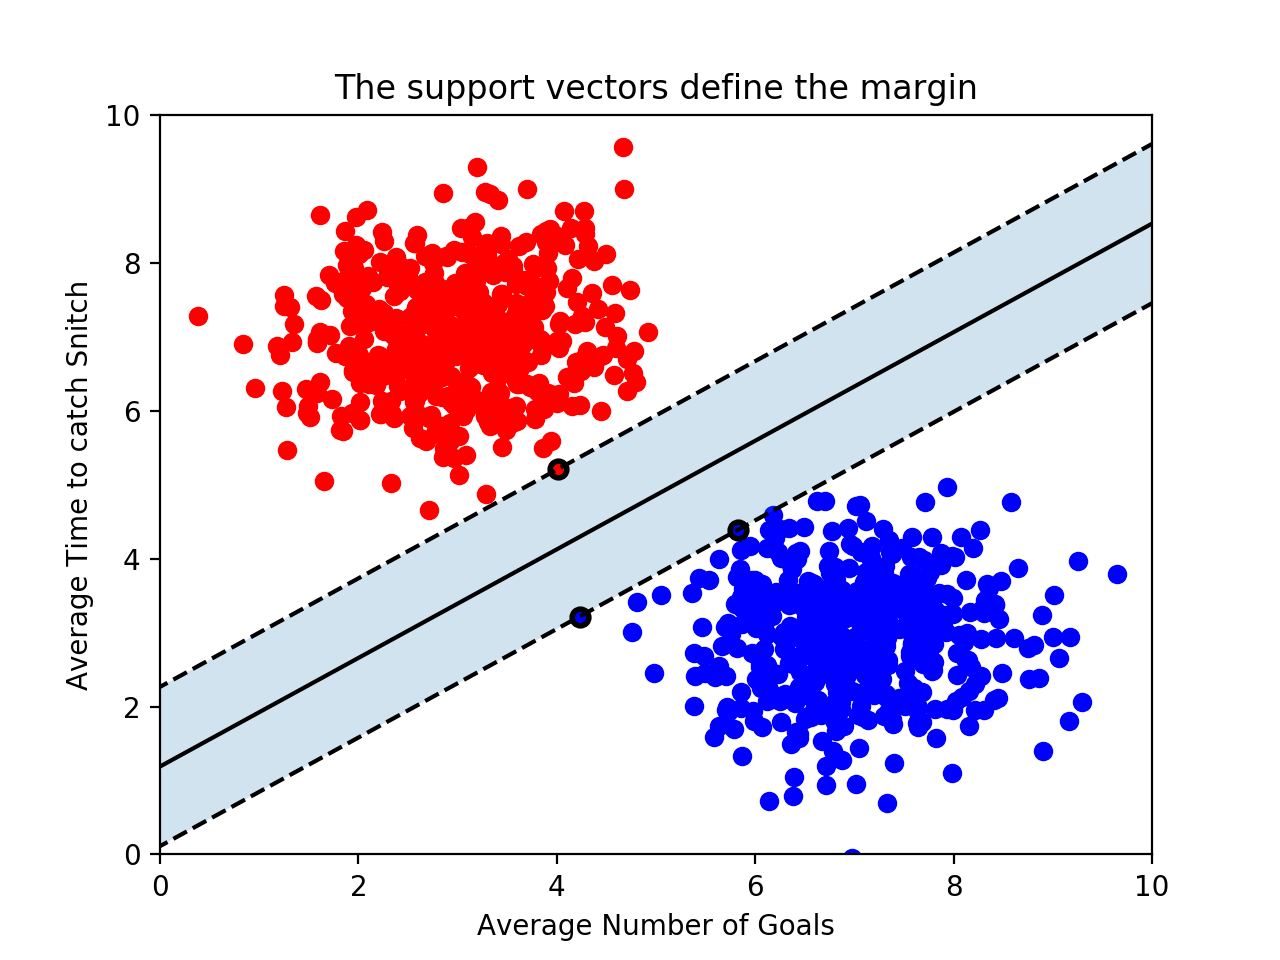



# scikit-learn

So far, we have explored the concepts of SVMs, but actually finding the **optimal decision boundary** requires solving a complex optimization problem. Fortunately, Python’s **scikit-learn** library provides a ready-to-use implementation.

**Creating a Classifier**

In scikit-learn, the model is called a **Support Vector Classifier (SVC)**:

In [2]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')

Here, the kernel='linear' parameter specifies that we want a linear boundary.

Training the Model
The classifier is trained using the .fit() method, which takes the training data and their labels:

In [3]:
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

classifier.fit(training_points, labels)

SVC(kernel='linear')

Calling .fit() automatically computes the decision boundary.

Making Predictions
Once trained, the classifier can predict labels for new data points using .predict(). Even if you are classifying a single point, it must be passed inside a list:

In [4]:
print(classifier.predict([[3, 2]]))

[1]


In this example, [3, 2] falls on the red side of the decision boundary, so the model predicts the label 1 (red).

Inspecting Support Vectors
You can also view which training points became the support vectors by accessing:

In [5]:
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]
